<a href="https://colab.research.google.com/github/akbarrfaizal/M-Faizal-Akbar/blob/main/CapstoneProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LATAR BELAKANG MASALAH**

Sebuah perusahaan consumer goods ingin mengetahui karakteristik dari customer yang berbelanja di tokonya.

#**PERNYATAAN MASALAH**

Perusahaan ingin mengetahui
1. Karakteristik pelanggan dilihat dari berbagai macam segi, yaitu status pernikahan, usia, pendidikan, jumlah anak, dan pendapatan.
2. Kapan waktu paling banyak pelanggan berbelanja?

#**DATA**

Pada tahap pertama, kita perlu deskripsikan data apa saja yang terdapat dalam dataset

Demografi
- ID: ID pelanggan (bersifat unik)
- Year_Birth: Tahun lahir pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status pernikahan pelanggan
- Income: Pendapatan rumah tangga tahunan pelanggan
- Kidhome: Jumlah anak dalam rumah tangga pelanggan
- Teenhome: Jumlah remaja dalam rumah tangga pelanggan
- Dt_Customer: Tanggal pendaftaran pelanggan dengan perusahaan
- Recency: Jumlah hari sejak pembelian terakhir pelanggan
- Complain: 1 jika pelanggan komplain dalam 2 tahun terakhir, 0 jika sebaliknya

Produk
- MntWines: Jumlah yang dihabiskan untuk wine dalam 2 tahun terakhir
- MntFruits: Jumlah yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir
- MntMeatProducts: Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah yang dihabiskan untuk membeli ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah yang dihabiskan untuk permen dalam 2 tahun terakhir
- MntGoldProds: Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir

Promosi
- NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1: 1 jika pelanggan menerima penawaran di kampanye pertama, 0 sebaliknya
- AcceptedCmp2: 1 jika pelanggan menerima penawaran di kampanye ke-2, 0 sebaliknya
- AcceptedCmp3: 1 jika pelanggan menerima penawaran di kampanye ke-3, 0 sebaliknya
- AcceptedCmp4: 1 jika pelanggan menerima penawaran di kampanye ke-4, 0 sebaliknya
- AcceptedCmp5: 1 jika pelanggan menerima penawaran di kampanye ke-5, 0 sebaliknya
- Response: 1 jika pelanggan menerima tawaran di kampanye terakhir, 0 sebaliknya

Kategori Pembelian
- NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
- NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
- NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

#**LIBRARY**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
df=pd.read_csv("/content/marketing_campaign.csv",sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
#menampilkan dataset 5 teratas dan 5 terbawah
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

Secara umum kita bisa lihat bahwa:
- Pada variabel Year_Birth ada data pelanggan dengan tahun lahir 1899 yang kemungkinan menjadi outlier
- Pada variabel Marital_Status terdapat beberapa data aneh seperti absurd, yolo, alone yang bukan merupakan status pernikahan. Selain itu perlu dilihat juga jumlah kemunculan data divorced, widow, dan together untuk kemudian bisa digabungkan menjadi 2 kategori saja yaitu menikah (married) dan tidak menikah (single).
- Z_CostContact hanya ada 1 nilai
- Z_Revenue hanya ada 1 nilai

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#**1. DATA CLEANING AND PREPARATION**

#**1.1 Handle Missing Value**
Langkah pertama adalah cek apakah ada missing value, karena dapat menyebabkan bias terhadap hasil analisis apabila dibiarkan

In [9]:
na=df.isna().sum()
na

ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Z_CostContact          0 
Z_Revenue              0 
Response               0 
dtype: int64

terdapat **24 missing value** pada kolom **income**. Ada dua cara untuk handle ini, karena jumlahnya hanya sedikit atau sekitar 1% bisa saja langsung di drop(hapus), namun akan lebih baik jika bisa handle dengan cara lain yaitu akan kita isi dengan data average dari income.

In [10]:
#Hitung average dari variabel income
avg_income = df['Income'].mean().round(0)
print(avg_income)

52247.0


In [11]:
df['Income'] = df['Income'].fillna(avg_income)

In [12]:
na=df.isna().sum()
na

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Sudah tidak ada data null (missing value) pada dataset

#**1.2 Cek data double/duplikat kemudian hapus jika ada**

In [13]:
# number of rows in dataframe before dropping duplicates
df.shape[0]

2240

ID merupakan data unik dari setiap pelanggan sehingga akan kita keluarkan dulu untuk melihat apakah ada data duplikat dari kombinasi seluruh variabel di bawah atau tidak

In [14]:
df2 = df.drop(columns=['ID'])
df2

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,3,11,0


In [15]:
df2 = df2.drop_duplicates()
df2

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,...,6,0,0,0,0,0,0,3,11,0
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,3,11,0


Terlihat bahwa data sebelumnya memiliki 2240 rows, setelah dihilangkan data duplikatnya menjadi 2058. Artinya ada sebanyak 182 data yang kita buang karena dianggap sebagai data duplikat

In [16]:
df2.shape[0]

2058

#**1.3 Cek Outliers** 

**1.3.1 Cek Outliers variabel Year_birth**

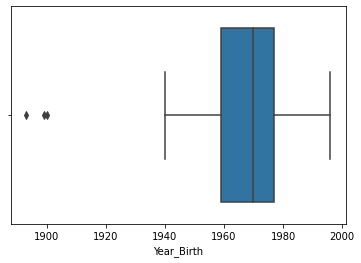

In [17]:
sns.boxplot(x=df2['Year_Birth'])

Jika dilihat dari boxplot variabel Year_Birth, ada 3 data yang menjadi outlier. Karena jumlahnya sedikit sehingga bisa langsung dikeluarkan

In [18]:
df2.drop(df2[df2['Year_Birth'] < 1920].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**1.3.2 Cek Variabel Marital_Status**

In [19]:
df2.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [20]:
df2['Marital_Status'].value_counts()

Married     795
Together    520
Single      447
Divorced    215
Widow       71 
Alone       3  
Absurd      2  
YOLO        2  
Name: Marital_Status, dtype: int64

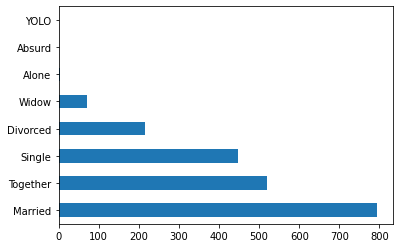

In [21]:
df2['Marital_Status'].value_counts().plot(kind='barh')

Berdasarkan grafik di atas terlihat bahwa jumlah data Marital_Status dengan kategori YOLO, Absurd, dan Alone hanya 7 data sehingga bisa langsung dikeluarkan.

In [22]:
del_mar = ['YOLO', 'Absurd', 'Alone']
df2.drop(df2[df2['Marital_Status'].isin(del_mar)].index, inplace=True)

In [23]:
df2['Marital_Status'].value_counts()

Married     795
Together    520
Single      447
Divorced    215
Widow       71 
Name: Marital_Status, dtype: int64

Sementara untuk data Marital_Status dengan kategori Married, Together, Single, Divorced, dan Widow akan kita kategorikan ke dalam 2 kategori saja yaitu menikah (Married) dan tidak menikah (Single).

In [24]:
replace={"Single":"Single","Married":"Married","Widow":"Single","Divorced":"Single","Together":"Married"}
df2['Marital_Status']=df2['Marital_Status'].replace(replace)
df2.Marital_Status.unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['Single', 'Married'], dtype=object)

In [25]:
df2['Marital_Status'].value_counts()

Married    1315
Single     733 
Name: Marital_Status, dtype: int64

In [26]:
df2.shape[0]

2048

Sampai sini dataset yang kita punya menjadi 2048 rows yang tidak ada duplikat, serta sudah kita bersihkan dari outliers pada variabel Year_Birth dan Marital_Status

**1.3.3 Cek Variabel Education**

In [27]:
df2.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [28]:
df2['Education'].value_counts()

Graduation    1028
PhD           446 
Master        339 
2n Cycle      186 
Basic         49  
Name: Education, dtype: int64

Variabel Education bisa dianggap aman dan tidak ada outlier atau abnormal text

**1.3.4 Cek Variabel Income**

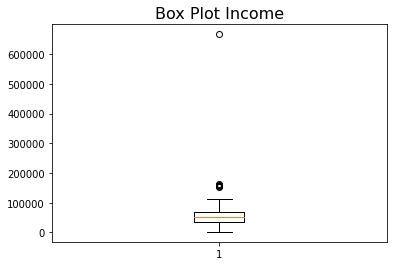

In [29]:
plt.boxplot(x=df2['Income'])
plt.title('Box Plot Income', size=16)
plt.show()

Berdasarkan boxplot untuk variabel Income seperti di atas, bisa disimpulkan bahwa terdapat outlier yang bisa menyebabkan analisis data menjadi bias sehingga akan kita keluarkan karena jumlahnya hanya sedikit.

In [30]:
df2.drop(df2[df2['Income'] > 140000].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**1.3.5 Keluarkan Variabel yang memiliki nilai konstan**

Keluarkan variabel Z_CostContact dan Z_Revenue karena dianggap sebagai variabel redundant yang hanya memiliki 1 nilai konstan dalam dataset.

In [31]:
df2.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
df2

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,...,0,3,4,0,0,0,0,0,0,0
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2237,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [32]:
df2.shape[0]

2040

Total baris dalam dataset yang kita punya saat ini adalah 2040 rows.

#**1.4 Membuat Variabel Baru untuk analisis**

In [33]:
from datetime import datetime

In [34]:
df2['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
print(max(df2.Dt_Customer))

2014-12-06 00:00:00


Tanggal pendaftaran customer terakhir pada kolom Dt_Customer adalah **6 Desember 2014**, jadi kita **asumsikan bahwa pengambilan data pada tahun 2015**, sehingga bisa dihitung usia para pelanggan pada saat itu.

In [36]:
#buat sebuah kolom baru yaitu usia customer
df2['Usia_Customer'] = 2015 - df2['Year_Birth']
df2['Usia_Customer']
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Usia_Customer
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,4,7,0,0,0,0,0,0,1,58
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,2,5,0,0,0,0,0,0,0,61
2,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,50
3,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,4,...,4,6,0,0,0,0,0,0,0,31
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,...,3,4,0,0,0,0,0,0,0,29
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,4,5,0,0,0,0,0,0,0,48
2237,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,13,6,0,1,0,0,0,0,0,34
2238,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,30,...,10,3,0,0,0,0,0,0,0,59


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


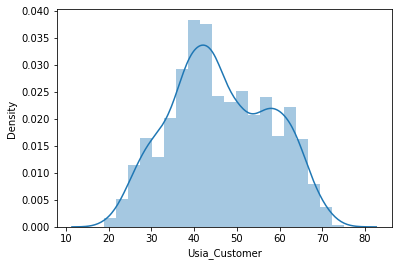

In [37]:
sns.distplot(df2.Usia_Customer)

In [38]:
#Membuat variabel hari saat customer berbelanja

df2['Day'] = df2['Dt_Customer'].dt.strftime('%A')
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Usia_Customer,Day
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,7,0,0,0,0,0,0,1,58,Monday
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,5,0,0,0,0,0,0,0,61,Sunday
2,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,50,Wednesday
3,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,4,...,6,0,0,0,0,0,0,0,31,Thursday
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,34,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,...,4,0,0,0,0,0,0,0,29,Friday
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,0,48,Thursday
2237,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,0,34,Saturday
2238,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,30,...,3,0,0,0,0,0,0,0,59,Friday


In [39]:
#buat sebuah kolom baru yaitu jumlah anak
df2['Jumlah_Anak'] = df2['Kidhome'] + df2['Teenhome']
df2['Jumlah_Anak']
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Usia_Customer,Day,Jumlah_Anak
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,0,1,58,Monday,0
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,0,61,Sunday,2
2,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,0,50,Wednesday,0
3,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,0,31,Thursday,1
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,0,34,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,...,0,0,0,0,0,0,0,29,Friday,0
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,0,48,Thursday,1
2237,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,0,1,0,0,0,0,0,34,Saturday,0
2238,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,0,59,Friday,1


In [40]:
#Membuat sebuah variabel baru untuk grouping apakah customer termasuk orang tua atau bukan
df2['Ortu'] = df2['Jumlah_Anak'].apply(lambda x : 'Orang Tua' if x > 0 else 'Bukan Orang Tua')
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Usia_Customer,Day,Jumlah_Anak,Ortu
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,1,58,Monday,0,Bukan Orang Tua
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,61,Sunday,2,Orang Tua
2,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,50,Wednesday,0,Bukan Orang Tua
3,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,31,Thursday,1,Orang Tua
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,34,Sunday,1,Orang Tua


In [41]:
#Membuat sebuah variabel baru yaitu total belanja
df2['Total_Belanja'] = (df2['MntWines'] + df2['MntFruits'] + df2['MntMeatProducts'] +
                      df2['MntFishProducts'] + df2['MntSweetProducts'] + df2['MntGoldProds'])
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Usia_Customer,Day,Jumlah_Anak,Ortu,Total_Belanja
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,1,58,Monday,0,Bukan Orang Tua,1617
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,61,Sunday,2,Orang Tua,27
2,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,50,Wednesday,0,Bukan Orang Tua,776
3,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,31,Thursday,1,Orang Tua,53
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,34,Sunday,1,Orang Tua,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,...,0,0,0,0,0,29,Friday,0,Bukan Orang Tua,22
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,48,Thursday,1,Orang Tua,1341
2237,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,0,34,Saturday,0,Bukan Orang Tua,1241
2238,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,59,Friday,1,Orang Tua,843


#**2. DATA ANALYSIS**

**2.1 Analisis Deskriptif**

In [47]:
df2.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Usia_Customer,Jumlah_Anak,Total_Belanja
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,...,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,51678.198039,0.446078,0.510294,49.016176,305.182353,26.283333,166.069608,37.367647,27.335294,43.841667,...,0.073529,0.077451,0.071569,0.065686,0.012745,0.009314,0.151961,46.138725,0.956373,606.079902
std,20600.887918,0.537951,0.546864,28.982064,337.096101,39.747044,221.608432,54.553025,41.824985,51.869842,...,0.261068,0.267371,0.257836,0.247794,0.112200,0.096081,0.359071,11.665725,0.748750,602.006143
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,5.000000
25%,35671.750000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,69.000000
50%,51844.500000,0.000000,0.000000,49.000000,176.000000,8.000000,67.500000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,1.000000,396.500000
75%,68098.250000,1.000000,1.000000,74.000000,505.000000,33.000000,228.500000,50.000000,34.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,1.000000,1044.250000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,2525.000000


In [55]:
df2_edu = df2['Education'].value_counts()
df2_edu

Graduation    1025
PhD           442 
Master        338 
2n Cycle      186 
Basic         49  
Name: Education, dtype: int64

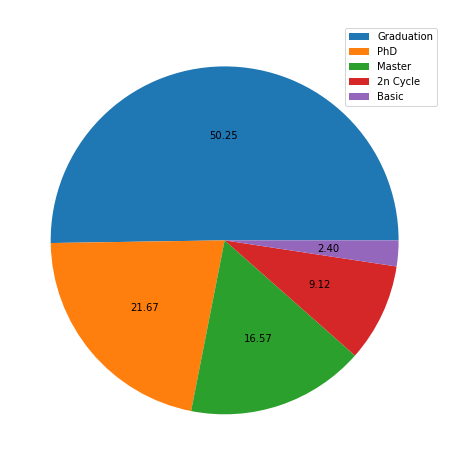

In [56]:
plt.figure(figsize = (10,8))
plt.pie(x = df2_edu, autopct = '%.2f')
plt.title('Customer Diagram by Education', color = 'white' )
plt.legend(df2_edu.index)
plt.show()

50.25% customer berlatar pendidikan Graduation, sementara paling sedikit adalah customer dengan latar belakang pendidikan Basic.

In [57]:
df2_mar = df2['Marital_Status'].value_counts()
df2_mar

Married    1308
Single     732 
Name: Marital_Status, dtype: int64

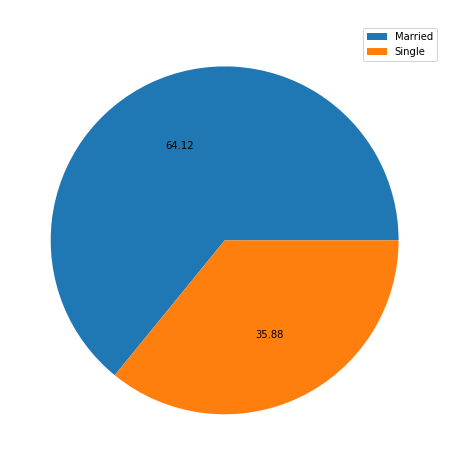

In [59]:
plt.figure(figsize = (10,8))
plt.pie(x = df2_mar, autopct = '%.2f')
plt.title('Customer Diagram by Marital Status', color = 'white' )
plt.legend(df2_mar.index)
plt.show()

64.12% customer menikah (Married), sementara sisanya yaitu 35.88% adalah Single.

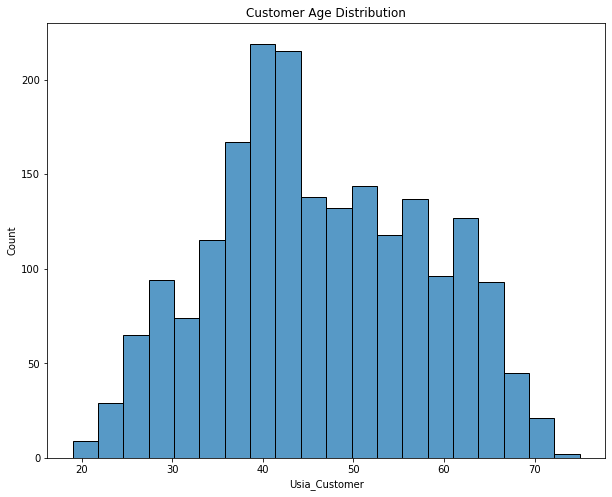

In [60]:
plt.figure(figsize = (10, 8))
sns.histplot(df2['Usia_Customer'])
plt.title('Customer Age Distribution')
plt.show()

Customer paling banyak berusia 35-40 tahun.

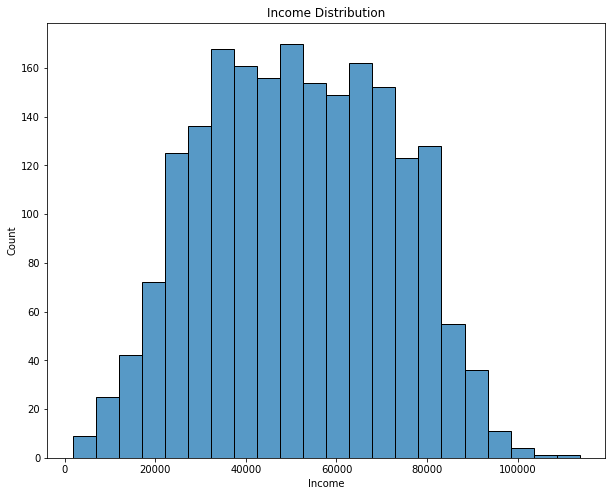

In [61]:
#INCOME PER CATEGORY
plt.figure(figsize = (10, 8))
sns.histplot(df2['Income'])
plt.title('Income Distribution')
plt.show()

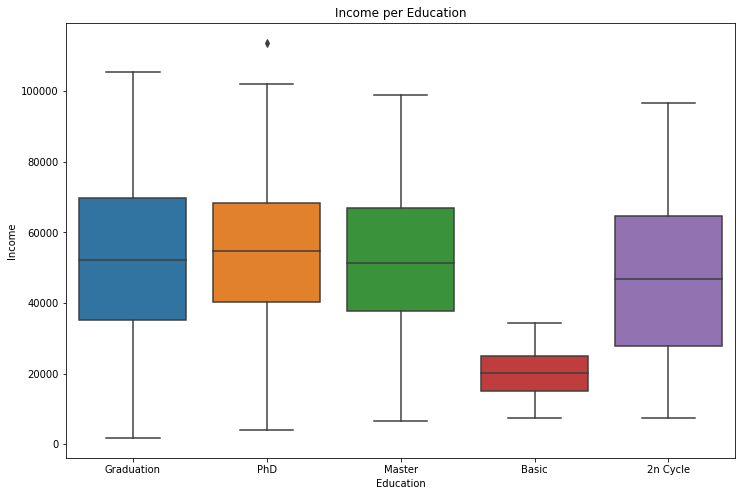

Income                                                         \
             count          mean           std     min       25%      50%   
Education                                                                   
2n Cycle    186.0   47661.500000  22105.859055  7500.0  27914.00  46861.0   
Basic       49.0    19913.346939  6365.638062   7500.0  15056.00  20194.0   
Graduation  1025.0  52125.361951  20741.056942  1730.0  35246.00  52247.0   
Master      338.0   52793.053254  19345.499543  6560.0  37766.75  51401.0   
PhD         442.0   55000.414027  18344.923154  4023.0  40314.00  54786.5   

                                
                 75%       max  
Education                       
2n Cycle    64667.25  96547.0   
Basic       24882.00  34445.0   
Graduation  69719.00  105471.0  
Master      66807.75  98777.0   
PhD         68445.75  113734.0

In [65]:
plt.figure(figsize=(12,8))

sns.boxplot(x='Education', y='Income', data=df2)
plt.title('Income per Education')
plt.show()

df2[['Education', 'Income']].groupby(['Education']).describe()

Dari grafik tersebut terlihat bahwa income dari kategori education Basic adalah yang paling rendah dibandingkan dengan kategori education yang lain.

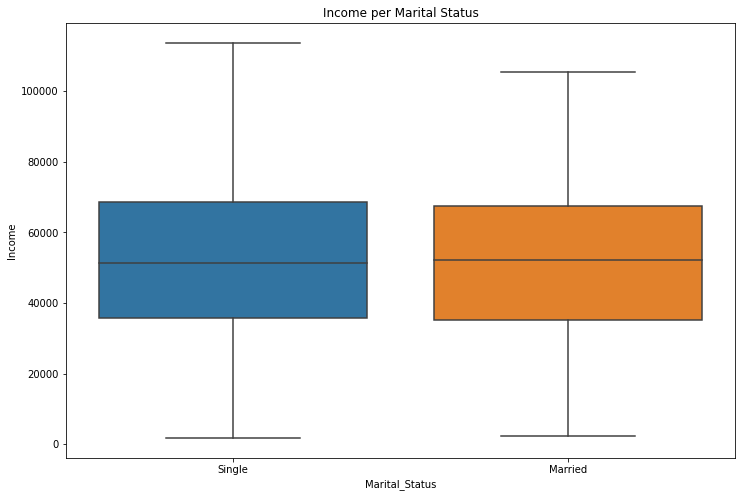

Income                                                        \
                 count          mean           std     min      25%      50%   
Marital_Status                                                                 
Married         1308.0  51508.420489  20363.800580  2447.0  35290.5  52225.0   
Single          732.0   51981.571038  21028.515713  1730.0  35860.0  51400.5   

                                   
                    75%       max  
Marital_Status                     
Married         67436.0  105471.0  
Single          68634.0  113734.0

In [68]:
plt.figure(figsize=(12,8))

sns.boxplot(x='Marital_Status', y='Income', data=df2)
plt.title('Income per Marital Status')
plt.show()

df2[['Marital_Status', 'Income']].groupby(['Marital_Status']).describe()

Jika dilihat dari grafik, income dari grup Married dan Single tidak begitu berbeda secara rata-rata.

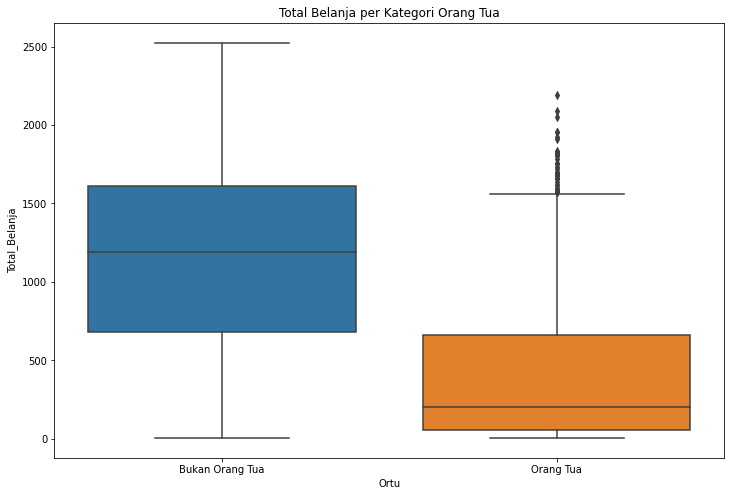

Total_Belanja                                               \
                        count         mean         std  min    25%     50%   
Ortu                                                                         
Bukan Orang Tua  570.0         1121.010526  640.126500  6.0  680.5  1192.5   
Orang Tua        1470.0        406.412925   448.930676  5.0  55.0   202.0    

                                 
                    75%     max  
Ortu                             
Bukan Orang Tua  1609.0  2525.0  
Orang Tua        661.0   2194.0

In [71]:
plt.figure(figsize=(12,8))

sns.boxplot(x='Ortu', y='Total_Belanja', data=df2)
plt.title('Total Belanja per Kategori Orang Tua')
plt.show()

df2[['Ortu', 'Total_Belanja']].groupby(['Ortu']).describe()

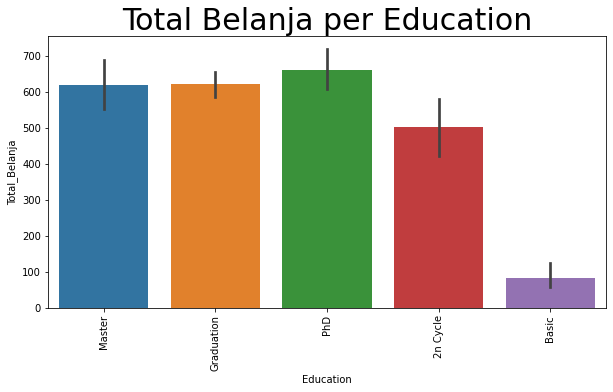

In [67]:
plt.figure(figsize=(10,5))
plt.title('Total Belanja per Education', size = 30)
sns.barplot(data=df2.sort_values(by='Total_Belanja', ascending=False), x='Education', y='Total_Belanja')
plt.xticks(rotation=90)
plt.show()

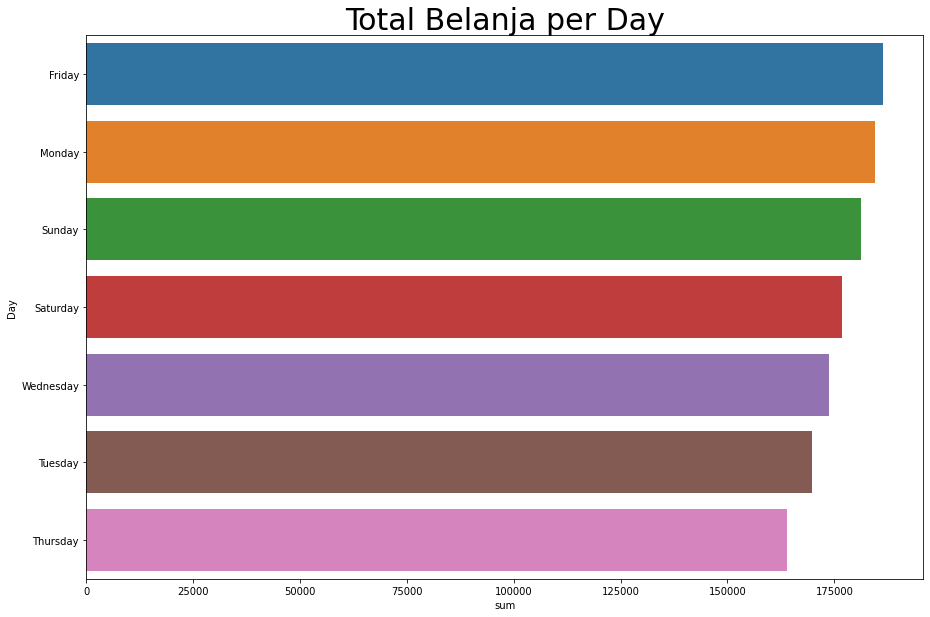

In [76]:
df_bel=df2.groupby('Day')['Total_Belanja'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False)
plt.figure(figsize=(15,10))
graph=sns.barplot(y='Day',x='sum',data=df_bel)
plt.title('Total Belanja per Day', size=30)
plt.show()

Customer paling banyak berbelanja saat weekend, tiga terendah adalah midweek yaitu Kamis, Selasa, dan Rabu.

**2.2 Cek korelasi antar variabel menggunakan diagram heatmap.**

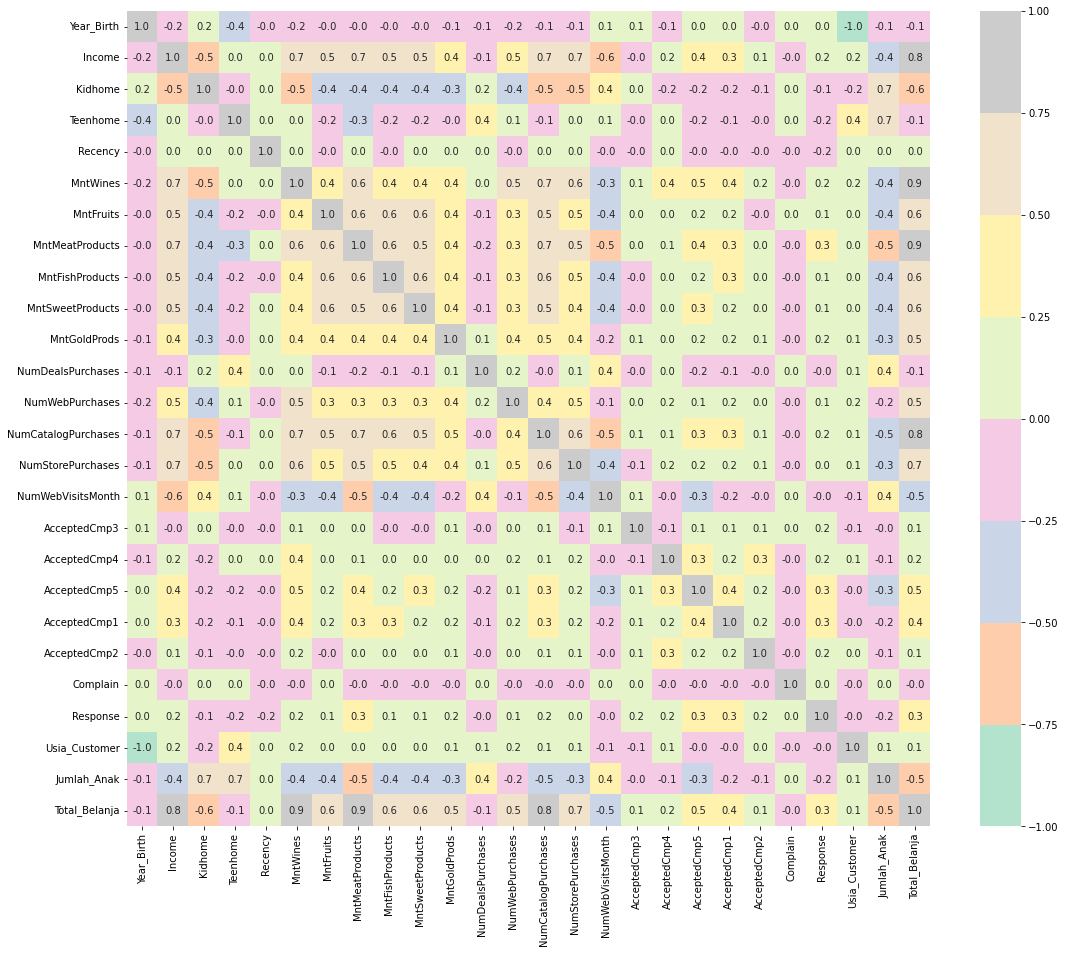

In [43]:
corr_matrix = df2.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True,fmt = ".1f", cmap='Pastel2')
plt.show()

Dari grafik korelasi di atas, kita bisa lihat bahwa korelasi antar variabel bervariasi, ada yang berkorelasi kuat seperti Total_Belanja vs Income, MntWines vs Total_Belanja, MntMeatProducts vs Total_Belanja. Ada pula variabel korelasi antara variabel Year_Birth vs Usia_Customer memiliki korelasi sempurna yaitu -1.0, di mana variabel Year_Birth terindikasi sebagai redundant variabel sehingga bisa dikeluarkan dari analisis.

In [45]:
df2.drop(['Year_Birth'], axis=1, inplace=True)
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Usia_Customer,Day,Jumlah_Anak,Ortu,Total_Belanja
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,0,0,0,0,1,58,Monday,0,Bukan Orang Tua,1617
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,0,0,0,0,0,61,Sunday,2,Orang Tua,27
2,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,50,Wednesday,0,Bukan Orang Tua,776
3,Graduation,Married,26646.0,1,0,2014-10-02,26,11,4,20,...,0,0,0,0,0,31,Thursday,1,Orang Tua,53
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,0,0,34,Sunday,1,Orang Tua,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,...,0,0,0,0,0,29,Friday,0,Bukan Orang Tua,22
2235,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,...,0,0,0,0,0,48,Thursday,1,Orang Tua,1341
2237,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,217,...,0,0,0,0,0,34,Saturday,0,Bukan Orang Tua,1241
2238,Master,Married,69245.0,0,1,2014-01-24,8,428,30,214,...,0,0,0,0,0,59,Friday,1,Orang Tua,843


**2.2 Uji Hipotesis**

Selain melihat korelasi antar variabel, kita juga bisa lakukan uji hipotesis untuk menguji beberapa hipotesis seperti berikut:

1. apakah total belanja orang yang sudah menikah lebih besar daripada orang yang single?
2. apakah total belanja berbeda berdasarkan tingkat pendidikannya?
3. apakah rata-rata total belanja berbeda antara grup orang tua dan grup bukan orang tua?

**2.2.1. apakah total belanja orang yang sudah menikah lebih besar daripada orang yang single?**

H0 : Tidak ada perbedaan signifikan untuk Total Belanja antara grup single dan married

H1 : Terdapat perbedaan signifikan untuk Total Belanja antara grup single dan married

In [79]:
from scipy.stats import shapiro

def checkDistribusi(values):
    norm, pval = shapiro(values)

    if pval < 0.05 :
        print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
        print ('DATA TIDAK BERDISTRIBUSI NORMAL')
    else :
        print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
        print ('DATA BERDISTRIBUSI NORMAL')

In [82]:
print('Total Belanja per Marital Status:')
checkDistribusi(df2.Total_Belanja)
print('\n')

categories = df2.Marital_Status.unique()
for cat in categories:
    print(cat)
    checkDistribusi(df2[df2.Marital_Status==cat].Total_Belanja)
    print('\n')

Total Belanja per Marital Status:
Tolak H0 Karena P-Value (1.0384933236009503e-38 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


Single
Tolak H0 Karena P-Value (2.5405310812144735e-24 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


Married
Tolak H0 Karena P-Value (2.8446069914192733e-32 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL




In [84]:
# Pengujian menggunakan Kruskal Wallis.

from scipy.stats import kruskal

krus, pVal = kruskal(
    df2[df2['Marital_Status'] == 'Single']['Total_Belanja'],
    df2[df2['Marital_Status'] == 'Married']['Total_Belanja'],
   
)

if pVal < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pVal} < 5%)')
    print ('Terdapat perbedaan signifikan untuk Total Belanja antara grup single dan married.')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pVal} > 5%)')
    print ('Tidak ada perbedaan signifikan untuk Total Belanja antara grup single dan married.')

Gagal Tolak H0 Karena P-Value (0.5174261894382945 > 5%)
Tidak ada perbedaan signifikan untuk Total Belanja antara grup single dan married.


**2.2.2. apakah rata-rata total belanja berbeda berdasarkan tingkat pendidikannya?**

H0 : Tidak ada perbedaan signifikan untuk Total Belanja di antara grup tingkat pendidikan.

H1 : Terdapat perbedaan signifikan untuk Total Belanja di antara grup tingkat pendidikan.

In [85]:
def checkDistribusi(values):
    norm, pval = shapiro(values)

    if pval < 0.05 :
        print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
        print ('DATA TIDAK BERDISTRIBUSI NORMAL')
    else :
        print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
        print ('DATA BERDISTRIBUSI NORMAL')

In [86]:
print('Total Belanja per Education:')
checkDistribusi(df2.Total_Belanja)
print('\n')

categories = df2.Education.unique()
for cat in categories:
    print(cat)
    checkDistribusi(df2[df2.Education==cat].Total_Belanja)
    print('\n')

Total Belanja per Education:
Tolak H0 Karena P-Value (1.0384933236009503e-38 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


Graduation
Tolak H0 Karena P-Value (7.107963682649376e-28 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


PhD
Tolak H0 Karena P-Value (2.490976659725863e-17 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


Master
Tolak H0 Karena P-Value (3.1533852103640426e-17 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


Basic
Tolak H0 Karena P-Value (1.6402159578460251e-12 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


2n Cycle
Tolak H0 Karena P-Value (9.483818624086288e-14 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL




In [88]:
# Pengujian menggunakan Kruskal Wallis.

from scipy.stats import kruskal

krus, pVal = kruskal(
    df2[df2['Education'] == '2n Cycle']['Total_Belanja'],
    df2[df2['Education'] == 'Basic']['Total_Belanja'],
    df2[df2['Education'] == 'Graduation']['Total_Belanja'],
    df2[df2['Education'] == 'Master']['Total_Belanja'],
    df2[df2['Education'] == 'PhD']['Total_Belanja'],
   
)

if pVal < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pVal} < 5%)')
    print ('Terdapat perbedaan signifikan untuk Total Belanja di antara grup tingkat pendidikan..')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pVal} > 5%)')
    print ('Tidak ada perbedaan signifikan untuk Total Belanja di antara grup tingkat pendidikan..')

Tolak H0 Karena P-Value (8.359153473156275e-13 < 5%)
Terdapat perbedaan signifikan untuk Total Belanja di antara grup tingkat pendidikan..


**2.2.3. apakah rata-rata total belanja grup orang tua lebih besar dari rata-rata total belanja grup bukan orang tua?**

H0 : rata-rata total belanja bukan orangtua = rata-rata total belanja orang tua

H1 : rata-rata total belanja bukan orangtua > rata-rata total belanja orang tua

a) non equal variance assumption

In [96]:
from scipy.stats import ttest_ind

#two sample independent t-test

result = list(ttest_ind(
              df2[df2['Ortu']=='Orang Tua']['Total_Belanja'],
              df2[df2['Ortu']=='Bukan Orang Tua']['Total_Belanja'],
              equal_var = False
    
))

print('T-Statistic:', result[0])
print('p-value:', result[1]/2)

#conclusion
if result[1]/2 < 0.05:
  print('Tolak H0')
else:
  print('Gagal Tolak H0')


T-Statistic: -24.424703091283586
p-value: 4.699312526263108e-99
Tolak H0


In [97]:
from scipy.stats import ttest_ind

#two sample independent t-test

result = list(ttest_ind(
              df2[df2['Ortu']=='Orang Tua']['Total_Belanja'],
              df2[df2['Ortu']=='Bukan Orang Tua']['Total_Belanja'],
              equal_var = True
    
))

print('T-Statistic:', result[0])
print('p-value:', result[1]/2)

#conclusion
if result[1]/2 < 0.05:
  print('Tolak H0')
else:
  print('Gagal Tolak H0')

T-Statistic: -28.420295924496674
p-value: 3.002494715946979e-150
Tolak H0


In [98]:
df2[['Total_Belanja','Ortu']].groupby(['Ortu']).mean()

,Total_Belanja
Ortu,
Bukan Orang Tua,1121.010526
Orang Tua,406.412925


#CONCLUSION

1. Mayoritas customer berlatar belakang pendidikan Graduation atau yang sudah lulus dari universitas
2. Produk paling banyak diminati adalah Wines dan Meat, paling sedikit fruits
3. Customer paling banyak membeli produk di store, dan paling jarang beli catalog purchase
4. Customer paling banyak berbelanja di hari minggu
5. Customer yang tidak mempunyai anak ternyata pengluarannya lebih tinggi daripada yang memiliki anak (orang tua)
6. Perusahaan bisa melakukan promosi untuk produk kategori selain meat dan wines untuk mengdongkrak penjualan produk-produk tersebut. Selain itu, hal tersebut bisa dilakukan pada hari minggu, karena disitu adalah hari aktifnya customer berbelanja.